In [4]:
import matplotlib.pyplot as mat
import numpy as np
from scipy import stats
from math import factorial, sqrt,pi
np.random.seed(42)

# 1.Random Variables
### Demonstration: discrete(Bernoulli) and continous(Normal) random variables; compute mean and variance

Bernoulli sample mean (approx p):  0.2887
Bernoulli sample var(approx p(1-p)):  0.20535231000000004

Normal sample mean(approx mu):  2.0185330937808708
Normal sample var (approx sigma^2):  2.2487603282724753


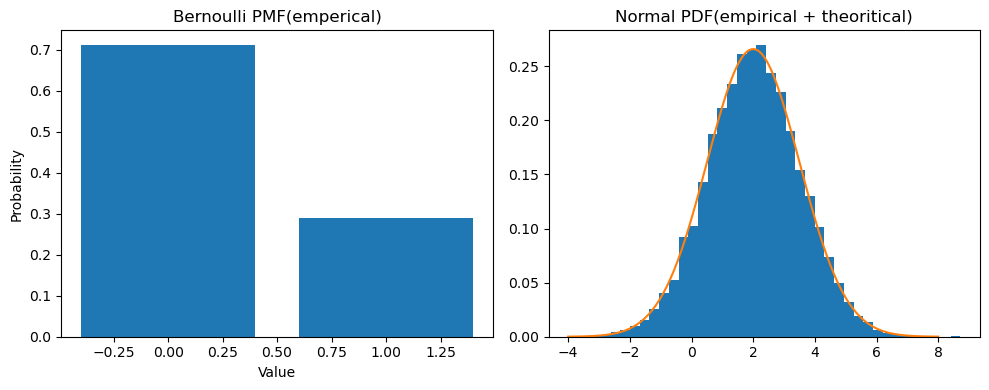

In [5]:

#Bernoulli (discrete) example
p =0.3
n_samples = 10000
bern = np.random.binomial(1,p,size=n_samples)
print('Bernoulli sample mean (approx p): ', bern.mean())
print('Bernoulli sample var(approx p(1-p)): ', bern.var())

#Normal (continous) example
mu,sigma = 2.0,1.5
norm_samples = np.random.normal(mu,sigma,size=n_samples)
print('\nNormal sample mean(approx mu): ', norm_samples.mean())
print('Normal sample var (approx sigma^2): ', norm_samples.var())

#Plot PDFs/PMFs
fig,axes = mat.subplots(1,2,figsize=(10,4))
#Bernoulli PMF
vals,counts = np.unique(bern, return_counts=True)
axes[0].bar(vals,counts/len(bern))
axes[0].set_title('Bernoulli PMF(emperical)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Probability')

#Normal PDF(empirical histogram + theoretical PDF)
axes[1].hist(norm_samples,bins = 40, density=True)
x =np.linspace(mu-4*sigma,mu+4*sigma,200)
axes[1].plot(x,stats.norm.pdf(x,mu,sigma))
axes[1].set_title('Normal PDF(empirical + theoritical)')
mat.tight_layout()
mat.show()

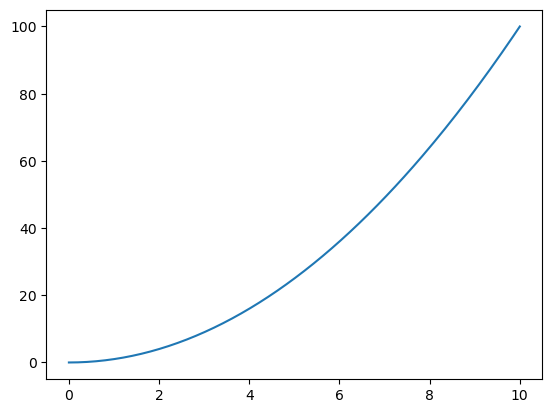

In [1]:
#Practice
import matplotlib.pyplot as mat
import numpy as np

x= np.linspace(0,10,200)
y = x**2
mat.plot(x,y)
mat.show()

# 2.Common Discrete Distributions
### Binomial, Poisson - theoritical PMF and sampling

Binomial theoritical mean, var:  4.0 2.4
Poisson theoritical mean, var:  3.0 3.0


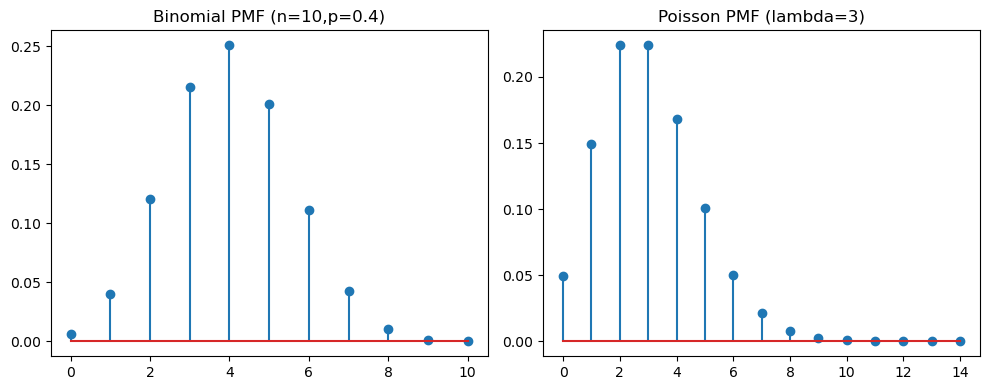

In [18]:
#Binomial example(n,p)
n,p = 10,0.4
k = np.arange(0,n+1)
pmf_binom = stats.binom.pmf(k,n,p)
print("Binomial theoritical mean, var: ",stats.binom.mean(n,p),stats.binom.var(n,p))

#Poisson example
lam = 3.0
k_p =np.arange(0,15)
pmf_pois = stats.poisson.pmf(k_p,lam)
print("Poisson theoritical mean, var: ",stats.poisson.mean(lam),stats.poisson.var(lam))

#Plot PMFs
fig,axes = mat.subplots(1,2,figsize=(10,4))
axes[0].stem(k,pmf_binom)
axes[0].set_title("Binomial PMF (n=10,p=0.4)")
axes[1].stem(k_p,pmf_pois)
axes[1].set_title("Poisson PMF (lambda=3)")
mat.tight_layout()
mat.show()

#stem and plot are basically same , try it out!!

# 3.Cotinuous  Distributions
### Uniform,Normal,Exponential - theoritical PDF and sampling

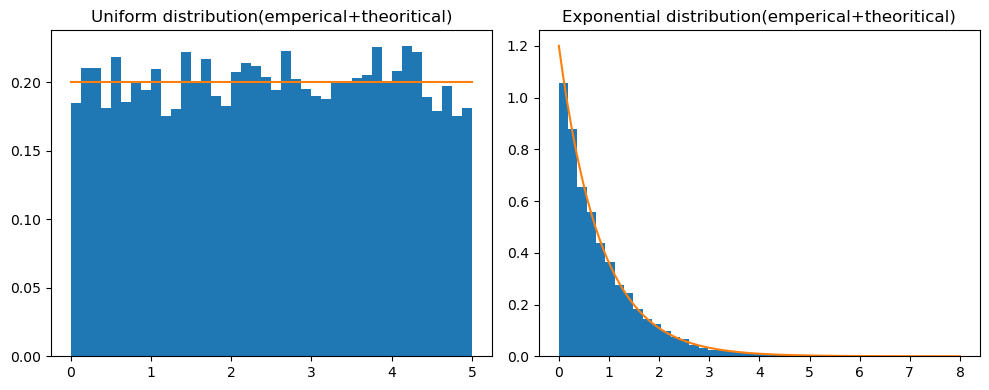

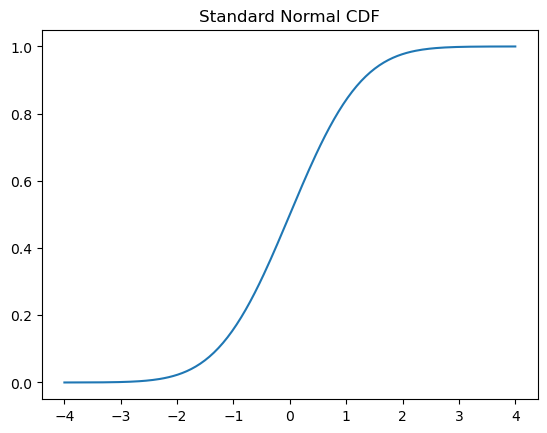

In [21]:
#Uniform(a,b)
a,b = 0,5
uni_samps = np.random.uniform(a,b,size=10000)
x= np.linspace(a,b,200)
#Exponential
lam =1.2
exp_samps = np.random.exponential(1/lam,size=10000)
x_exp = np.linspace(0,8,200)

fig,axes = mat.subplots(1,2,figsize=(10,4))
axes[0].hist(uni_samps,bins=40,density=True)
axes[0].plot(x,stats.uniform.pdf(x,a,b-a))
axes[0].set_title("Uniform distribution(emperical+theoritical)")

axes[1].hist(exp_samps,bins=40,density=True)
axes[1].plot(x_exp,stats.expon.pdf(x_exp,scale=1/lam))
axes[1].set_title("Exponential distribution(emperical+theoritical)")
mat.tight_layout()
mat.show()

#Normal shown previously; we can show standard normal CDF example
xs = np.linspace(-4,4,200)
mat.plot(xs,stats.norm.cdf(xs))
mat.title('Standard Normal CDF')
mat.show()

# 4.Multiple Random Variables
### Joint , Marginal, Coariance and Correlation examples

Emperical covariance:  0.6089346321588283
Emperical correlation:  0.6059667879842995


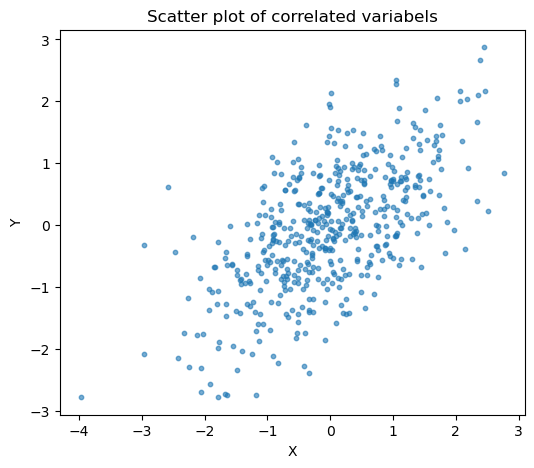

In [28]:
#Simulate correlated variables using a covariance matrix
mean=[0,0]
cov = [[1.0,0.6],[0.6,1.0]] #covariance matrix with positive correlation
samples = np.random.multivariate_normal(mean,cov,size=5000)
# print(samples)
x,y = samples[:,0],samples[:,1]
print("Emperical covariance: ",np.cov(x,y)[0,1])
print("Emperical correlation: ",np.corrcoef(x,y)[0,1])

#Scatter Plot
mat.figure(figsize=(6,5))
mat.scatter(x[:500],y[:500],s=10,alpha=0.6)
mat.title("Scatter plot of correlated variabels")
mat.xlabel('X')
mat.ylabel('Y')
mat.show()

# 5.Central Limit Theorem(CLT)
### Simulate smaple means from an exponential distribution and observe covergence to normality

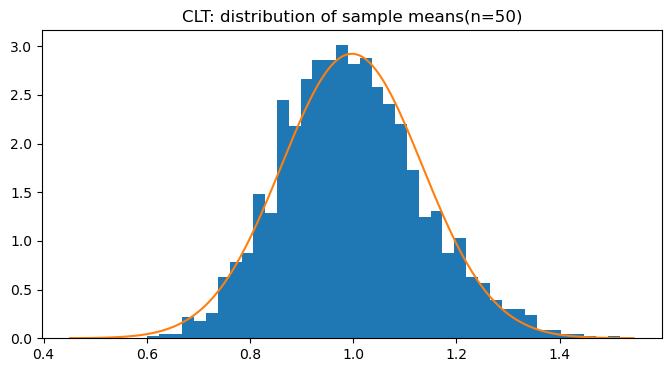

Sample means mean:  0.9973852678336416 std: 0.1365500752891665


In [31]:
#CLT demonstration
pop = np.random.exponential(scale=1.0,size=2000000) #population(skewed)
sample_size = 50
n_trials =  2000
means = [np.mean(np.random.choice(pop,sample_size)) for _ in range(n_trials)]
mat.figure(figsize=(8,4))
mat.hist(means,bins=40,density=True)
#overlay normal with same mean and variance
mu_hat = np.mean(means)
sigma_hat = np.std(means)
x = np.linspace(mu_hat-4*sigma_hat,mu_hat+4*sigma_hat,200)
mat.plot(x,stats.norm.pdf(x,mu_hat,sigma_hat))
mat.title(f"CLT: distribution of sample means(n={sample_size})")
mat.show()
print("Sample means mean: ",mu_hat,'std:',sigma_hat)